In [1]:
import pandas as pd
import os

folder = r"C:\projects\portfolio-risk-assessment\Data\raw"
assets = ['AAPL', 'MSFT', 'TLT', 'VNQ', 'SPY']

dfs = {}
for ticker in assets:
    file_path = os.path.join(folder, f"{ticker}_data.csv")
    dfs[ticker] = pd.read_csv(file_path, index_col=0, parse_dates=True)


C:\Users\USER\AppData\Local\Temp\ipykernel_20596\2244544391.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dfs[ticker] = pd.read_csv(file_path, index_col=0, parse_dates=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_20596\2244544391.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dfs[ticker] = pd.read_csv(file_path, index_col=0, parse_dates=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_20596\2244544391.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dfs[ticker] = pd.read_csv(file_path, index_col=0, parse_dates=True)
C:\Users\USER\AppData\Local\Temp\ipyk

In [4]:
returns = pd.DataFrame()
for ticker in assets:
    # Ensure 'Close' is numeric before calculating returns
    close_prices = pd.to_numeric(dfs[ticker]['Close'], errors='coerce')
    returns[ticker] = close_prices.pct_change()


In [5]:
summary = returns.describe()
print(summary)


              AAPL         MSFT          TLT          VNQ          SPY
count  1674.000000  1674.000000  1674.000000  1674.000000  1674.000000
mean      0.001285     0.001166    -0.000045     0.000396     0.000706
std       0.019853     0.018136     0.010560     0.014731     0.012670
min      -0.128647    -0.147390    -0.066683    -0.177277    -0.109424
25%      -0.007969    -0.007402    -0.006607    -0.006298    -0.004377
50%       0.001368     0.001156     0.000231     0.000866     0.000904
75%       0.011714     0.010481     0.006140     0.007530     0.006780
max       0.153289     0.142169     0.075195     0.089967     0.105019


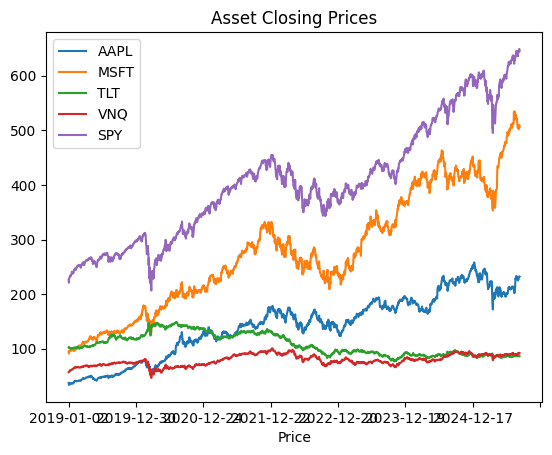

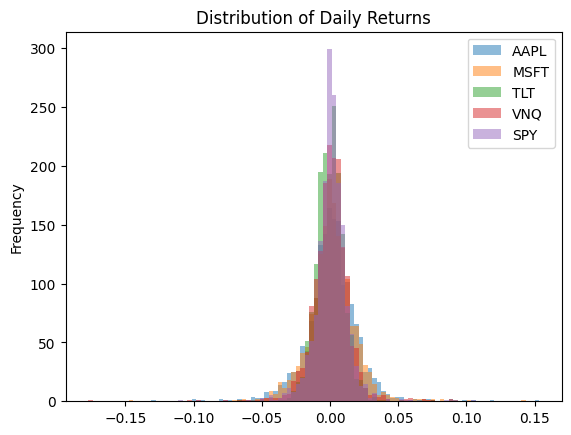

In [8]:
import matplotlib.pyplot as plt

# Remove non-numeric rows from index for plotting
valid_returns = returns.loc[returns.index.to_series().str.match(r"\d{4}-\d{2}-\d{2}")]

# Plot closing prices
for ticker in assets:
    # Only plot rows with valid dates as index and ensure numeric dtype
    valid_close = dfs[ticker].loc[
        dfs[ticker].index.to_series().astype(str).str.match(r"\d{4}-\d{2}-\d{2}"), 'Close'
    ]
    valid_close = pd.to_numeric(valid_close, errors='coerce')
    valid_close.plot(label=ticker)
plt.title('Asset Closing Prices')
plt.legend()
plt.show()

# Plot returns distribution
valid_returns.plot(kind='hist', alpha=0.5, bins=100)
plt.title('Distribution of Daily Returns')
plt.show()


          AAPL      MSFT       TLT       VNQ       SPY
AAPL  1.000000  0.712274 -0.088977  0.523902  0.784022
MSFT  0.712274  1.000000 -0.101876  0.525749  0.809389
TLT  -0.088977 -0.101876  1.000000  0.009604 -0.145256
VNQ   0.523902  0.525749  0.009604  1.000000  0.769018
SPY   0.784022  0.809389 -0.145256  0.769018  1.000000


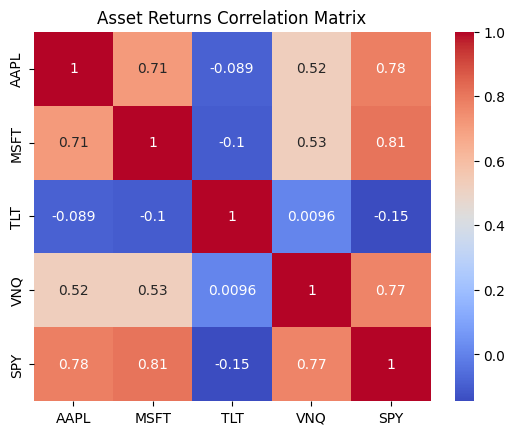

In [9]:
corr_matrix = returns.corr()
print(corr_matrix)
# Visualize
import seaborn as sns
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Asset Returns Correlation Matrix")
plt.show()


In [2]:
## EDA Summary

"""The exploratory analysis shows that our selected portfolio covers assets with varying risk and return profiles. The relatively low correlation between bonds (TLT), real estate (VNQ), and stocks (AAPL, MSFT, SPY) suggests strong diversification potential.  
These insights will guide the construction of robust Monte Carlo simulations and inform future decisions on portfolio allocation and risk management."""

'The exploratory analysis shows that our selected portfolio covers assets with varying risk and return profiles. The relatively low correlation between bonds (TLT), real estate (VNQ), and stocks (AAPL, MSFT, SPY) suggests strong diversification potential.  \nThese insights will guide the construction of robust Monte Carlo simulations and inform future decisions on portfolio allocation and risk management.'